#Repaso: Transformación y Reducción de Dimensiones
##Francisco Javier Ramírez Arias
##Matrícula: A01316379
##Materia: Ciencia y Analítica de Datos
##Profesora: Dra. María de la Paz Rico Fernández
##Fecha: 26/Octubre/2022

#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= W.dot(D).dot(Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


#Comentarios
**Podemos observar que el tipo de datos de la matriz reconstruida es un de punto flotante, en comparación con la matriz original que son datos enteros. Para este ejercicio también observamos que la matriz reconstruida es igual a la matriz original. Para llevar a cabo la reconstrucción de los datos es necesario realizar el producto punto de de las matrices W, D y Winv.** 

In [ ]:
#Matriz 1
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= W.dot(D).dot(Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------


#Comentarios
**Observamos que la matriz reconstruida en este ejercicio tiene una parte real y una parte imaginaria, podemos ver que la parte real es muy cercana al valor de los datos originales.** 

In [ ]:
#Matriz 2
A = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= W.dot(D).dot(Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


##Comentarios
**Podemos observar que los eigenvalores son datos reales, y no cuentan con una parte imaginaria. Lo mismo sucede con los eigenvectores, solamente cuentan con parte real. La matriz de reconstrucción obtenida es un poco diferente a la original debido a que algunos de los elementos de la matriz de reconstrucción son muy pequeños o cercanos a los elementos de la matriz original.**

In [ ]:
#Matriz 3
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= W.dot(D).dot(Winv) 
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


##Comentarios
**Podemos observar que los eigenvalores y eigenvectores son datos de punto flotante, y no cuentan ccon parte imaginaria. La matriz de reconstrucción obtenida es similar a la original debido a que algunos de los elementos de la matriz de reconstrucción son muy pequeños o cercanos a los elementos de la matriz original. Para el caso de los elementos de la matriz original con valor de cero, los datos obtenidos en la matriz de reconstrucción son muy pequeños.**

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


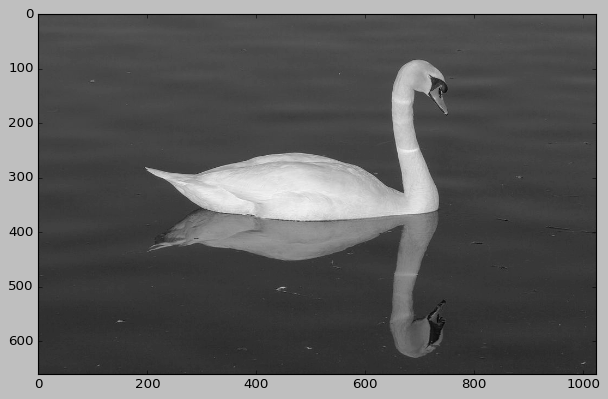

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F43570B9050>


In [ ]:
#Se cargan las diferentes librerias para trabajar con imágenes, así
#como las librerías de numpy, y matplo, para graficado.
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')

#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

#Código que permite realizar la visualización de la imagen.
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
#Descomposición singular de valores.
#U y V son  matrices unitarias de 2-Dimensiones.
#D es el vector de valores singulares. 
U,D,V = np.linalg.svd(imgmat)

#Imprime el tamaño de la imagen
imgmat.shape

(660, 1024)

In [ ]:
#Imprime el tamaño de U
U.shape

(660, 660)

In [ ]:
#Imprime el tamaño de V
V.shape

(1024, 1024)

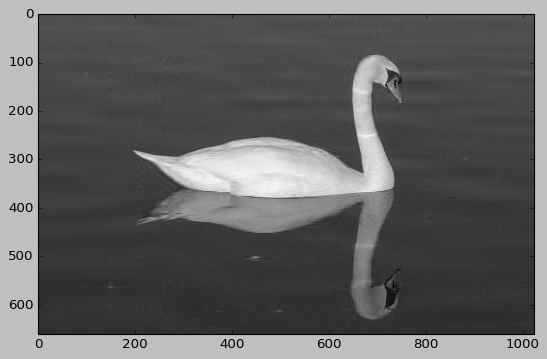

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[162. 162. 162. ... 104. 105. 108.]


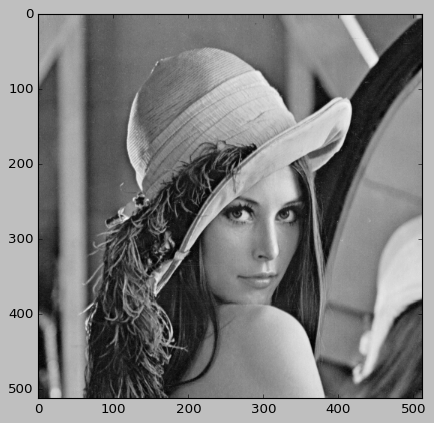

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=512x512 at 0x7F434CE4A310>


In [ ]:
#Imagen 1
img = Image.open('/content/sample_data/lena2.tif')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(512, 512)

In [ ]:
U.shape

(512, 512)

In [ ]:
V.shape

(512, 512)

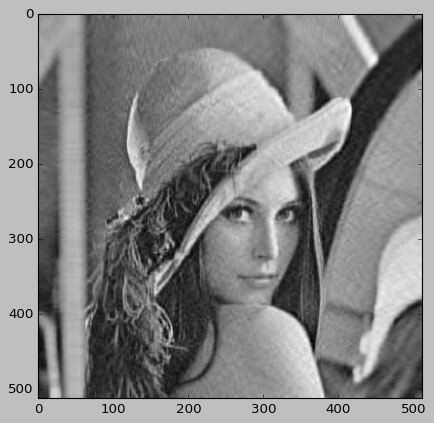

Felicidades la imagen está comprimida


In [ ]:
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[230. 229. 230. ...  73.  41.  28.]


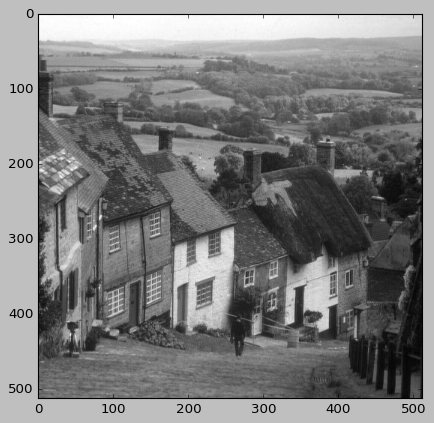

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=512x512 at 0x7F434CDAEE10>


In [ ]:
#Imagen 2
img = Image.open('/content/sample_data/goldhill2.tif')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(512, 512)

In [ ]:
U.shape

(512, 512)

In [ ]:
V.shape

(512, 512)

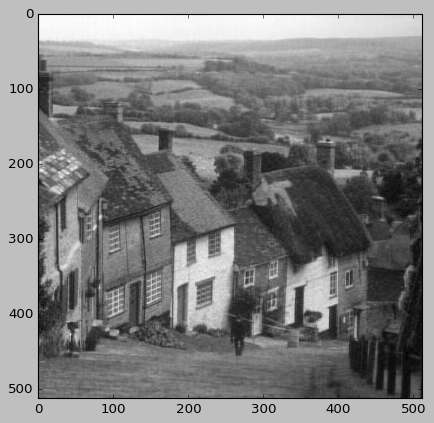

Felicidades la imagen está comprimida


In [ ]:
nvalue = 85
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[ 11.  58.  61. ... 180. 193. 191.]


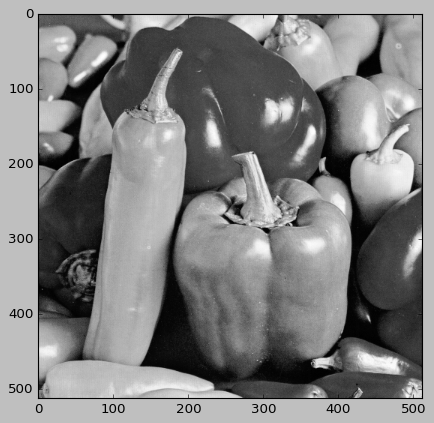

<PIL.TiffImagePlugin.TiffImageFile image mode=L size=512x512 at 0x7F434CE33F10>


In [ ]:
#Imagen 3
img = Image.open('/content/sample_data/peppers2.tif')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(512, 512)

In [ ]:
U.shape

(512, 512)

In [ ]:
V.shape

(512, 512)

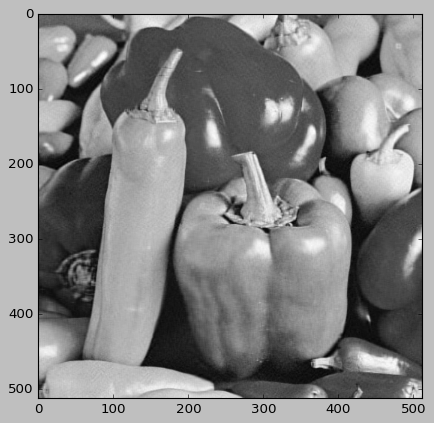

Felicidades la imagen está comprimida


In [ ]:
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

#Descripción del Método de SVD

**Las primeras líneas de código nos permiten cargar las diferentes librerías que son utilizadas para descargar la imagen, cargar la imagen, así como realizarle algunas operaciones de procesamiento, numpy es utilizada para el manejo de vectores y matrices, y matplotlib que es utilizada para la generación de gráficos. Los siguientes pasos fueron llevados a cabo para la compresión de las diferentes imágenes.**

**1.	Se cargó la imagen.**

**2.	Se visualizo la imagen.**

**3.	Se realiza la descomposición singular de valores.**

**4.	Se obtienen las matrices de valores singulares, y el vector de valores singulares.**

**5.	Obtenemos el tamaño de cada una estos.**

**6.	Para realizar la reconstrucción de la imagen original, seleccionamos el tamaño de las diferentes matrices. Al utilizar el tamaño adecuado de la matriz podemos observar que la imagen reconstruida es muy simular e incluso idéntica a la imagen original, al que poner atención para poder distinguir la diferencias entre las imágenes. AL utilizar un valor pequeño del parámetro que define el tamaño de las matrices, nos permite realizar una compresión de la imagen. Es decir, nosotros podemos recuperar la imagen original sin utilizar el 100% del tamaño de las diferentes matrices.** 

**7.	Realizamos la reconstrucción de la imagen por medio de la multiplicación Im_Reconstruida = U*D*V.**

**8.	Desplegamos la imagen, para poder realizar las diferentes comparaciones visuales.**

**El mismo procedimiento fue llevado a cabo con 3 imágenes seleccionadas por nosotros, La primera imagen que seleccionamos es “Lena2.tif”. Observamos que con un valor de “nvalue = 50”, se alcance a visualizar la imagen, pero presenta ciertos defectos, podríamos mencionar que se observa una imagen grumosa, por así decirlo. La segunda imagen seleccionada se encuentra etiquetada como “GoldHill2.tif”. Para recuperar la imagen utilizamos un valor de “nvalue = 85”, con este valor podemos observar que la imagen recuperada es muy similar a la imagen original, se requiere una gran atención para poder detectar las diferencias, o el uso de alguna métrica para verificar la calidad de la imagen. La tercera imagen seleccionada se encuentra etiquetada como “peppers2”, Observamos que con un valor de “nvalue=100” la imagen recuperada es muy similar a la imagen original, en comparación con un valor de “nvalue=85”, la imagen con un valor de 100 presenta mayores detalles al momento de su reconstrucción, lo que nos indica que dentro del tamaño de estas matrices se encuentra contenida la mayor información para realizar una reconstrucción adecuada.**


# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [ ]:
#Se importan las librrias adecuadas para realizar 
#le analisis de componentes principales (PCA)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

# Cargamos los datos a utilizar
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Se lleva a cabo la transformación de las variables
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Desarrollo del modelo PCA
pca = PCA(n_components=2) # Solo se estiman 2 componentes principales.
X_new = pca.fit_transform(X) # Se proyectan los datos originales en el espacio PCA.

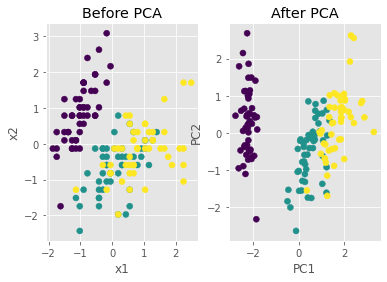

In [ ]:
#Se grafican los datos en el espacio original y despue en el espacio PCA
#por medio de una grafica de dispersión
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

#Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 
**Antes del análisis de componentes principales podemos observar en la gráfica de dispersión las diferentes clases, las cuales se encuentran traslapadas, sobre todo las clases de color verde y amarilla. Después de aplicar PCA observamos que los datos de las diferentes clases se encuentran un poco más separadas, la separación se presenta entre las diferentes clases, otro que se puede apreciar es que entre las clases los datos se encuentran agrupados. Esto permite que los diferentes modelos de clasificación puedan obtener mejores métricas de desempeño.**


In [ ]:
#imprime la varianza de los componentes principales.
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
#Imprime la matriz de covarianza
#para comprobar  la igualdad de la
#varianza del espacio reducido.
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [ ]:
#Los valores de la diagonal tienen la varianza y son iguales
#a los eigenvalores actuales de la covarianza almacenada en
#la siguiente variable.
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [ ]:
#La importancia de cada caracteristica se encuentra reflejada por la
#magnitud de los correspondientes valores dentrod de los eigenvectores
#mayor magnitud , mayor importancia.
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [ ]:
#Grafica de biplot para una mejor visualizacion de los eigenvectores
#del analisis de componentes principales y la dispersion de los datos
#dentro del espacio PCA. 
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

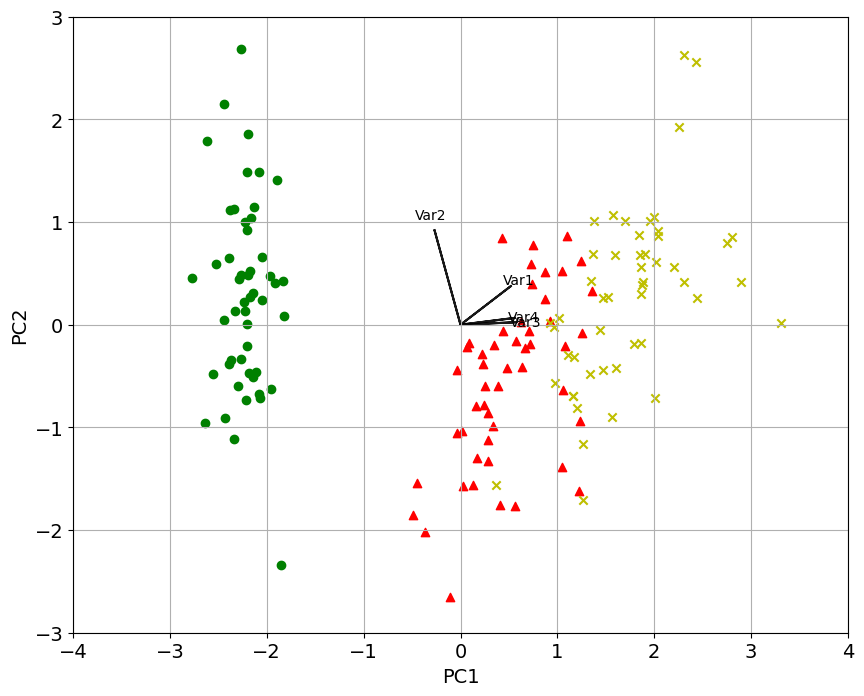

In [ ]:
#Importa la libreria matplotlib
#Manda a llamar a la función de graficado
#y muestra las grafica de los datos y los
#vectores de caracteristicas
 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [ ]:
#Imprime el coeficiente de correlacion entre las
#variables 3 y 4, en base al resultado observamos
#que estas se encuentran positivamente correlacionadas. 

np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [ ]:
#Imprime el coeficiente de correlacion entre las 
#variables 2 y 3, en base al resultado observamos
#que estas se encuentran negativamente correlacionadas. 
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

#Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

**¿Qué es feature importance y para que nos sirve?**
**Es la magnitud correspondiente de los valores dentro de los eigenvectores, este nos indica que características tienen mayor magnitud, y por lo tanto mayor importancia. Lo cual te permite identificar características de relevancia, que pueden permitir mejorar el rendimiento de los algoritmos de clasificación.**

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**
**Las variables 3 y 4 se encuentran positivamente correlacionadas, mientras que las variables 2 y 3 están negativamente relacionadas. Lo que nos indica que para generar un modelo de clasificación, es una buena opción seleccionar lar variables 3 y 4, y muy probablemente se obtengan buenas métricas de desempeño.**

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

**Este conocimiento los aplicaría para identificar la importancia de las diferentes variables, y poder llevar a cabo un entrenamiento de modelos de aprendizaje maquina más eficiente y obtener mejores métricas de desempeño. Lo anterior se llevaría a cabo por medio de un conjunto de datos reducido. El análisis de componentes principales también impactaría en las trasformaciones que son realizadas a los datos dentro del “pipeline”, probablemente no sería necesario realizar tantas operaciones.**

